In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import Flatten, Dense, Input, ReLU

In [3]:
path_to_dataset = '../dataset/'
PATH = os.path.join(os.path.dirname(path_to_dataset))
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

num_classes = 2
BATCH_SIZE = 32
IMG_SIZE = (64, 64)

In [5]:
# Train dataset 
train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             seed=123,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)

Found 782 files belonging to 2 classes.


In [6]:
# Validation dataset
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  seed=123,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)


Found 220 files belonging to 2 classes.


In [7]:
# Model - Keep it simple
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        tf.keras.layers.Dense(16, activation=tf.nn.relu),
        tf.keras.layers.Dense(8, activation=tf.nn.relu),
        tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax)
    ])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 16)                196624    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 196,778
Trainable params: 196,778
Non-trainable params: 0
_________________________________________________________________


In [9]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

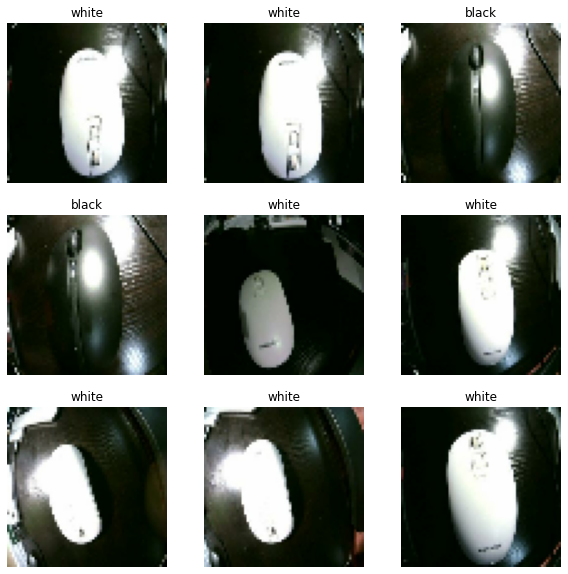

In [11]:
# Visualize the dataset 
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [14]:
# Hyperparameter 
base_learning_rate = 0.001
initial_epochs = 5

# Compile the model 
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [15]:
# Evaluate model before training 
loss0, accuracy0 = model.evaluate(validation_dataset)

6/6 [==============================] - 0s 1ms/step - loss: 19.4548 - accuracy: 0.6968


In [16]:
# Train model 
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/5
25/25 [==============================] - 0s 5ms/step - loss: 32.2563 - accuracy: 0.8977 - val_loss: 1.6877 - val_accuracy: 0.9681
Epoch 2/5
25/25 [==============================] - 0s 5ms/step - loss: 0.6517 - accuracy: 0.9949 - val_loss: 7.3457 - val_accuracy: 0.9415
Epoch 3/5
25/25 [==============================] - 0s 5ms/step - loss: 0.5117 - accuracy: 0.9936 - val_loss: 0.4957 - val_accuracy: 0.9521
Epoch 4/5
25/25 [==============================] - 0s 5ms/step - loss: 0.7266 - accuracy: 0.9898 - val_loss: 7.6455 - val_accuracy: 0.8511
Epoch 5/5
25/25 [==============================] - 0s 5ms/step - loss: 0.4344 - accuracy: 0.9910 - val_loss: 17.9707 - val_accuracy: 0.9415


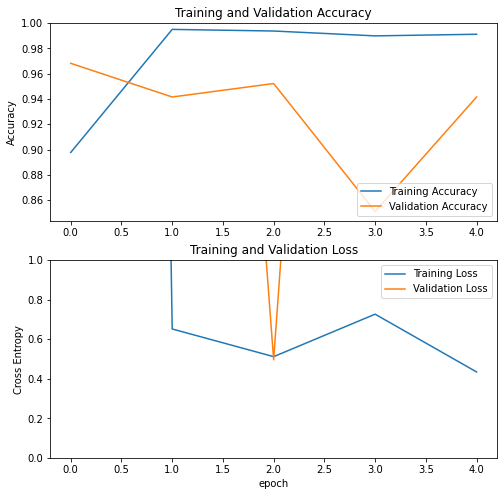

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
# Further finetuning
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 14.1155 - val_accuracy: 0.9521
Epoch 6/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 15.3327 - val_accuracy: 0.9415
Epoch 7/15
25/25 [==============================] - 0s 6ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 15.3053 - val_accuracy: 0.9415
Epoch 8/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 15.3033 - val_accuracy: 0.9415
Epoch 9/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.9815 - val_accuracy: 0.9628
Epoch 10/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 9.6088 - val_accuracy: 0.9681
Epoch 11/15
25/25 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 12.9320 - val_ac

In [19]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

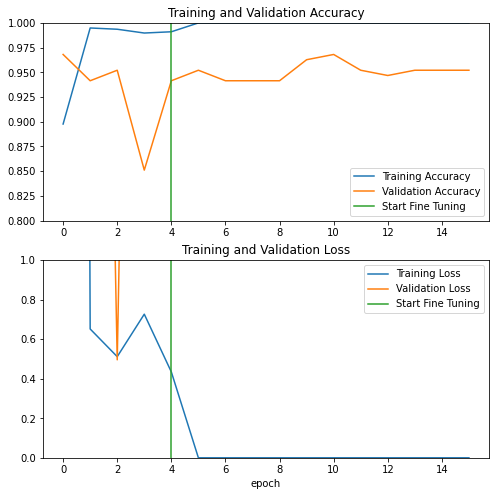

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [21]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 40ms/step - loss: 30.8349 - accuracy: 0.9062
Test accuracy : 0.90625


Predictions:
 [0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0]
Labels:
 [0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0]


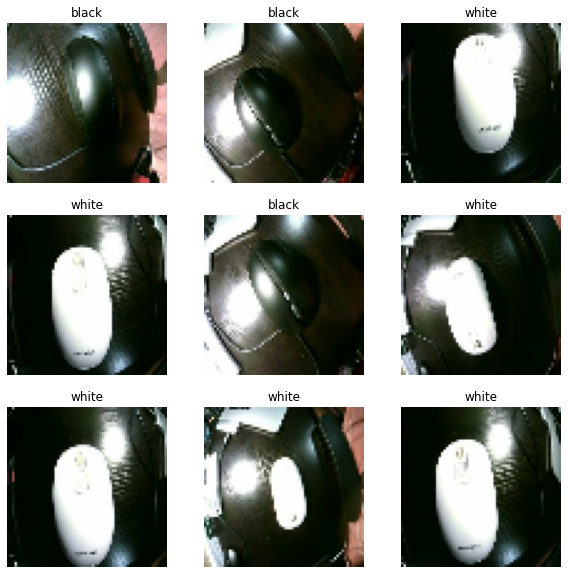

In [22]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a argmax to our model
predictions = tf.math.argmax(predictions, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch
     )

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[predictions[i]])
    plt.axis("off")

In [23]:
#To quantize the input and output tensors, and make the converter throw an error if it encounters an 
# operation it cannot quantize, convert the model again with some additional parameters

def representative_dataset():
    for _ in range(100):
        data = np.random.rand(1, IMG_SIZE[0], IMG_SIZE[1], 3)
        yield [data.astype(np.float32)]

In [24]:
# Save model 
model.save('mouse_model.h5')

In [25]:
# Load saved model 
model=tf.keras.models.load_model("mouse_model.h5")

# Apply model compression -  integer-only quantization¶
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8  # or tf.uint8
tflite_quant_model = converter.convert()

2021-11-04 11:11:38.479792: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpfrvuy7e5/assets


2021-11-04 11:11:38.799910: I tensorflow/core/grappler/devices.cc:69] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-11-04 11:11:38.800044: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-11-04 11:11:38.801191: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1144] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.006ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-11-04 11:11:38.830467: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:345] Ignored output_format.
2021-11-04 11:11:38.830516: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:348] Ignored drop_control_dependency.
2021-11-04 11:11:38.833394: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
fully_quantize: 0,

In [26]:
!nvidia-smi

Thu Nov  4 11:11:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   53C    P3    N/A /  N/A |    801MiB /  4040MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
# Save quantized model 
open("mouse_quantized.tflite", "wb").write(tflite_quant_model)

199336

# Remove models

In [ ]:
rm -rf mouse_quantized.tflite

In [ ]:
rm -rf mouse_model.h5

# Future works

- Apply data augmentation
- Hyperparameter tuning 
- Use MobileNetv1 and MobileNetv2
- Evaluate the impact of quantization on accuracy